In [46]:
import numpy as np
import pandas as pd
import seaborn as sn 
from sklearn import datasets
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='x1', ylabel='x2'>

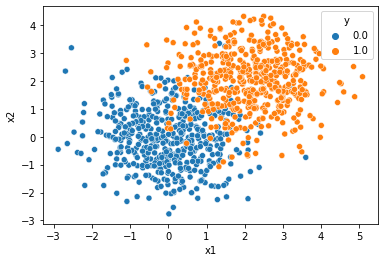

In [54]:
def generate_data_1(m, n=500): 
    X_0 = np.random.normal(0, 1, size=(n, 2))
    X_1 = np.random.normal(m, 1, size=(n, 2))
    X = np.concatenate([X_0, X_1], axis=0)
    Y = np.concatenate([np.zeros(shape=(n,1)), np.ones(shape=(n,1))], axis=0)
    data = np.concatenate([X, Y], axis=1)
    data = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
    return data
data = generate_data_1(2, n=500)
sn.scatterplot(data=data, x='x1', y='x2', hue='y')

<AxesSubplot:xlabel='x1', ylabel='x2'>

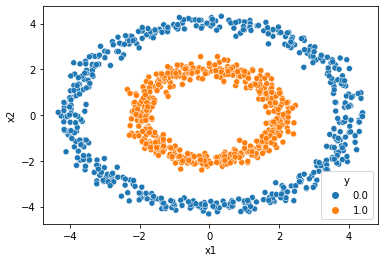

In [55]:
def generate_data_2(noise, n=500): 
    data = list(datasets.make_circles(n*2, factor=.5))
    data[0] = data[0]*4
    data[0] = data[0] + np.random.normal(0, noise, size=data[0].shape)
    data = np.concatenate([data[0], data[1].reshape(-1,1)], axis=1)
    data = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
    return data
data = generate_data_2(0.2, n=500)
sn.scatterplot(data=data, x='x1', y='x2', hue='y')

- Run SVM method using different kernel functions: linear, radial, polynomial

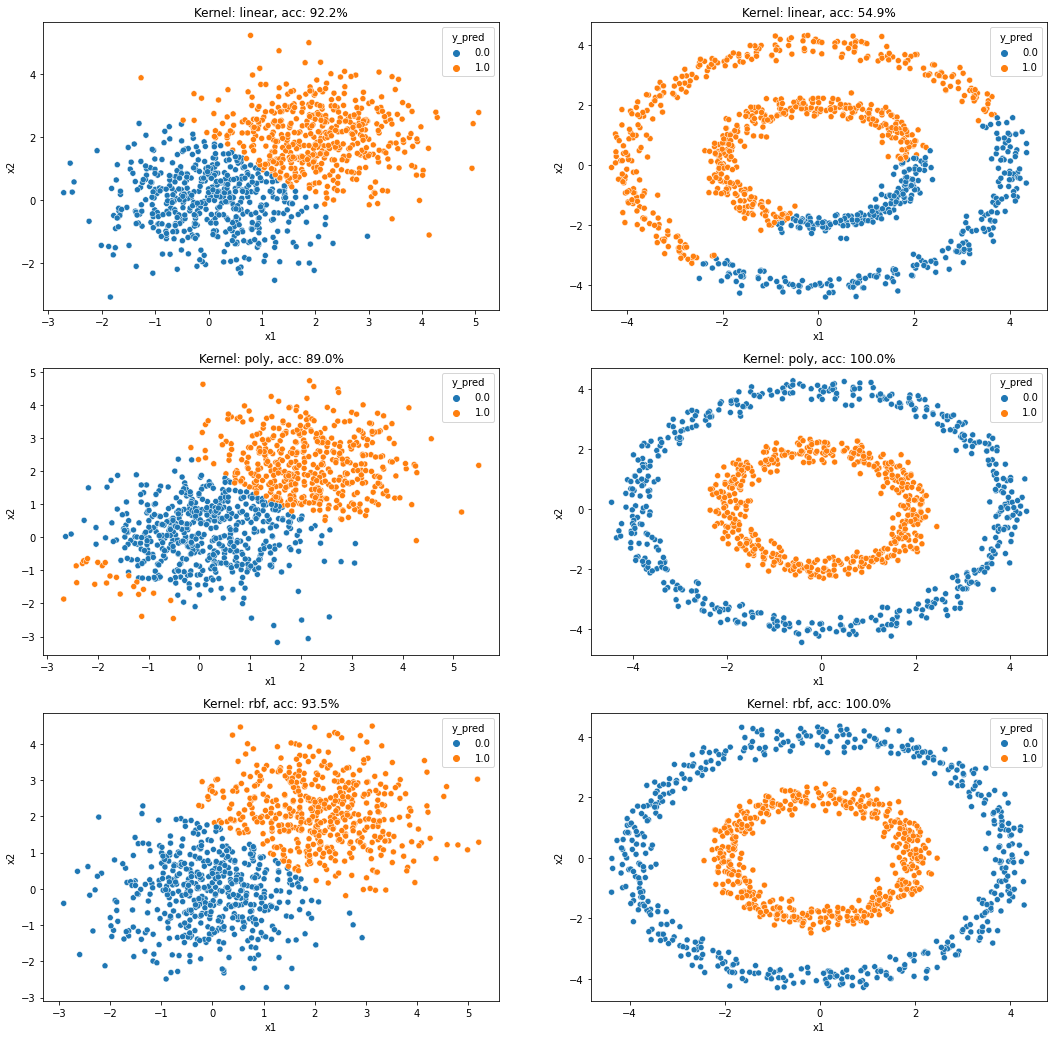

In [80]:
#{‘linear’, ‘poly’, ‘rbf’} 
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
fig, axs = plt.subplots(nrows=len(kernels), ncols=2, figsize=(9*2,6*len(kernels)))
for j, kernel in enumerate(kernels): 
    for i,dataset in enumerate([generate_data_1(m=2), generate_data_2(noise=0.2)]):
        model = SVC(kernel=kernel, degree=2)
        model = model.fit(dataset[['x1','x2']].values, dataset['y'].values)
        dataset['y_pred'] = model.predict(dataset[['x1','x2']].values)
        acc = round(100*model.score(dataset[['x1','x2']].values, dataset['y'].values), 2)
        sn.scatterplot(data=dataset, x='x1', y='x2', hue='y_pred', ax=axs[j,i])
        axs[j,i].set_title(f'Kernel: {kernel}, acc: {acc}%')

- Investigate the influence of parameter m (in the case of Dataset 1) and variance of the
noise (in the case of Dataset 2).

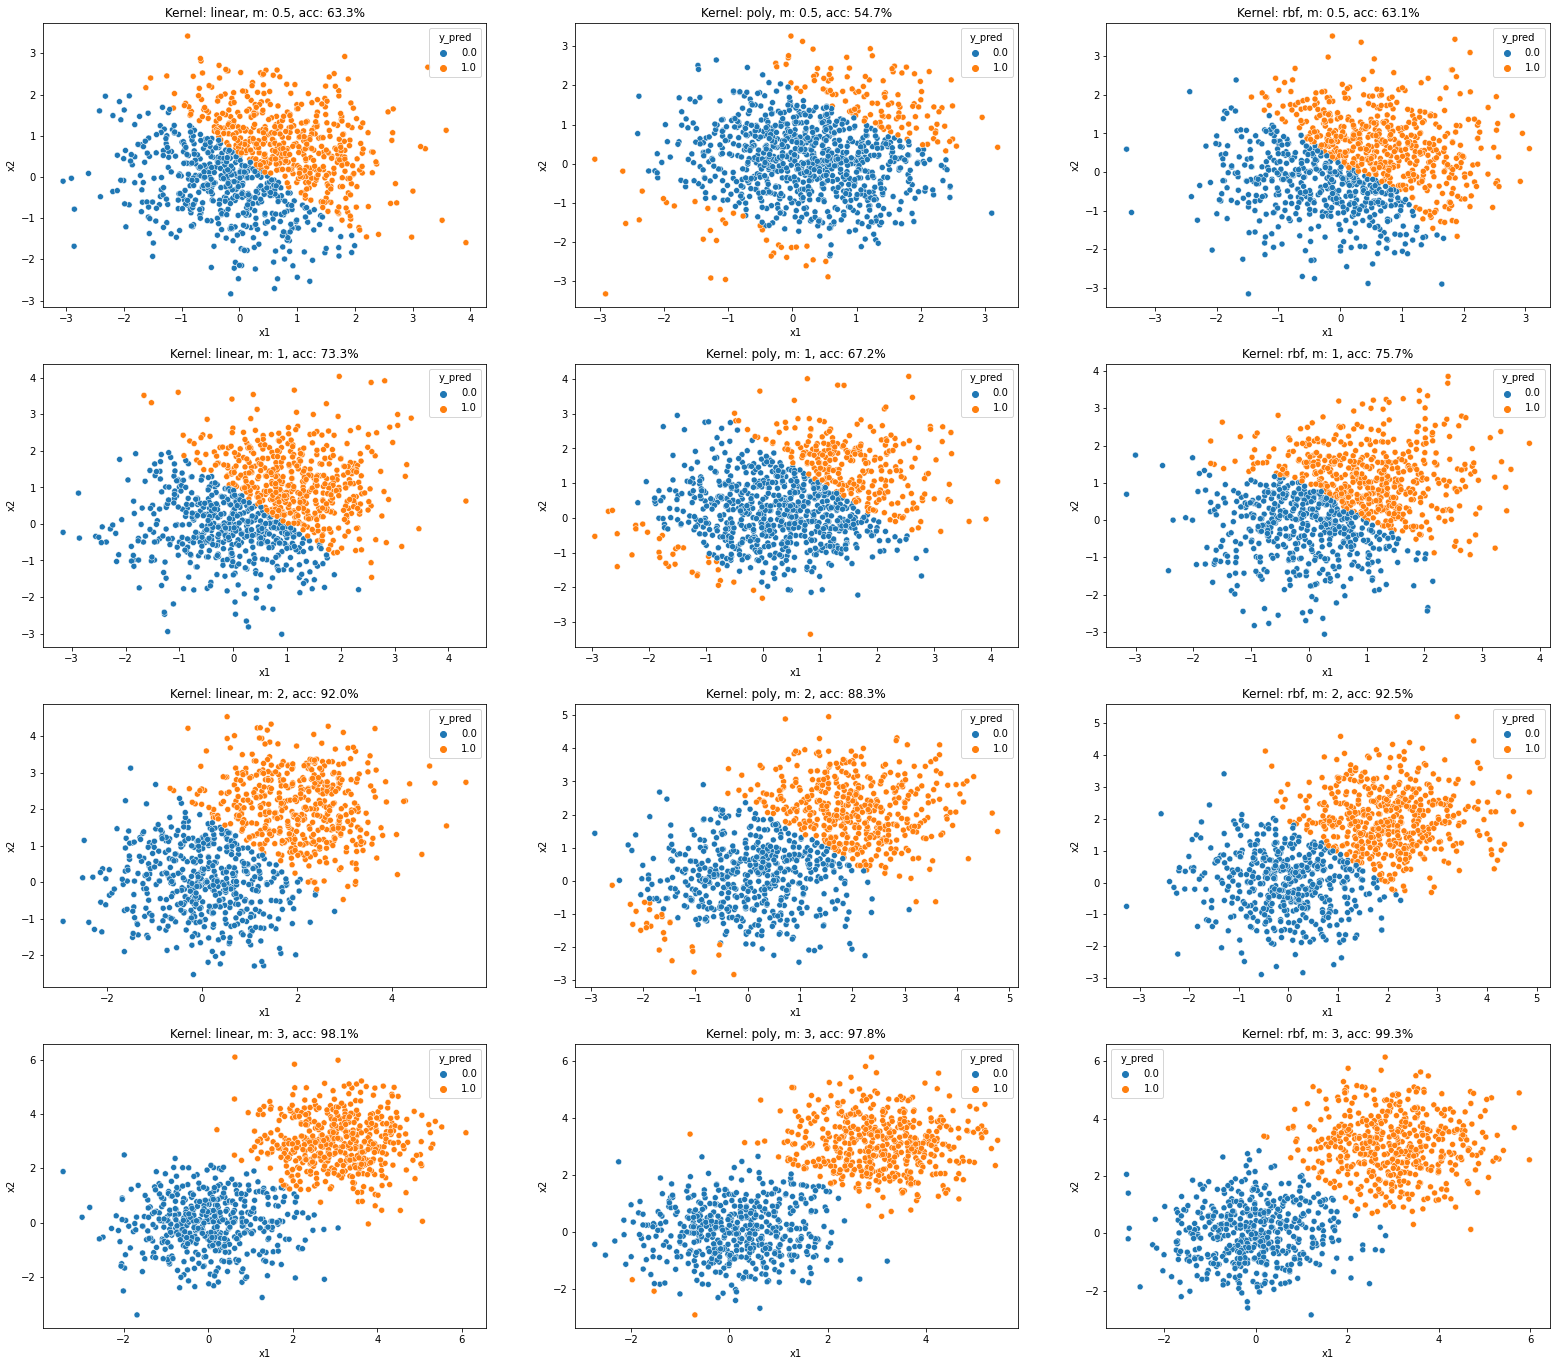

In [78]:
kernels = ['linear', 'poly', 'rbf']
ms = [0.5, 1, 2, 3]
fig, axs = plt.subplots(nrows=len(ms), ncols=len(kernels), figsize=(9*len(kernels),6*len(ms)))

for j, kernel in enumerate(kernels): 
    for i,m in enumerate(ms):
        dataset = generate_data_1(m=m)
        model = SVC(kernel=kernel, degree=2)
        model = model.fit(dataset[['x1','x2']].values, dataset['y'].values)
        dataset['y_pred'] = model.predict(dataset[['x1','x2']].values)
        acc = round(100*model.score(dataset[['x1','x2']].values, dataset['y'].values), 2)
        sn.scatterplot(data=dataset, x='x1', y='x2', hue='y_pred', ax=axs[i,j])
        axs[i,j].set_title(f'Kernel: {kernel}, m: {m}, acc: {acc}%')

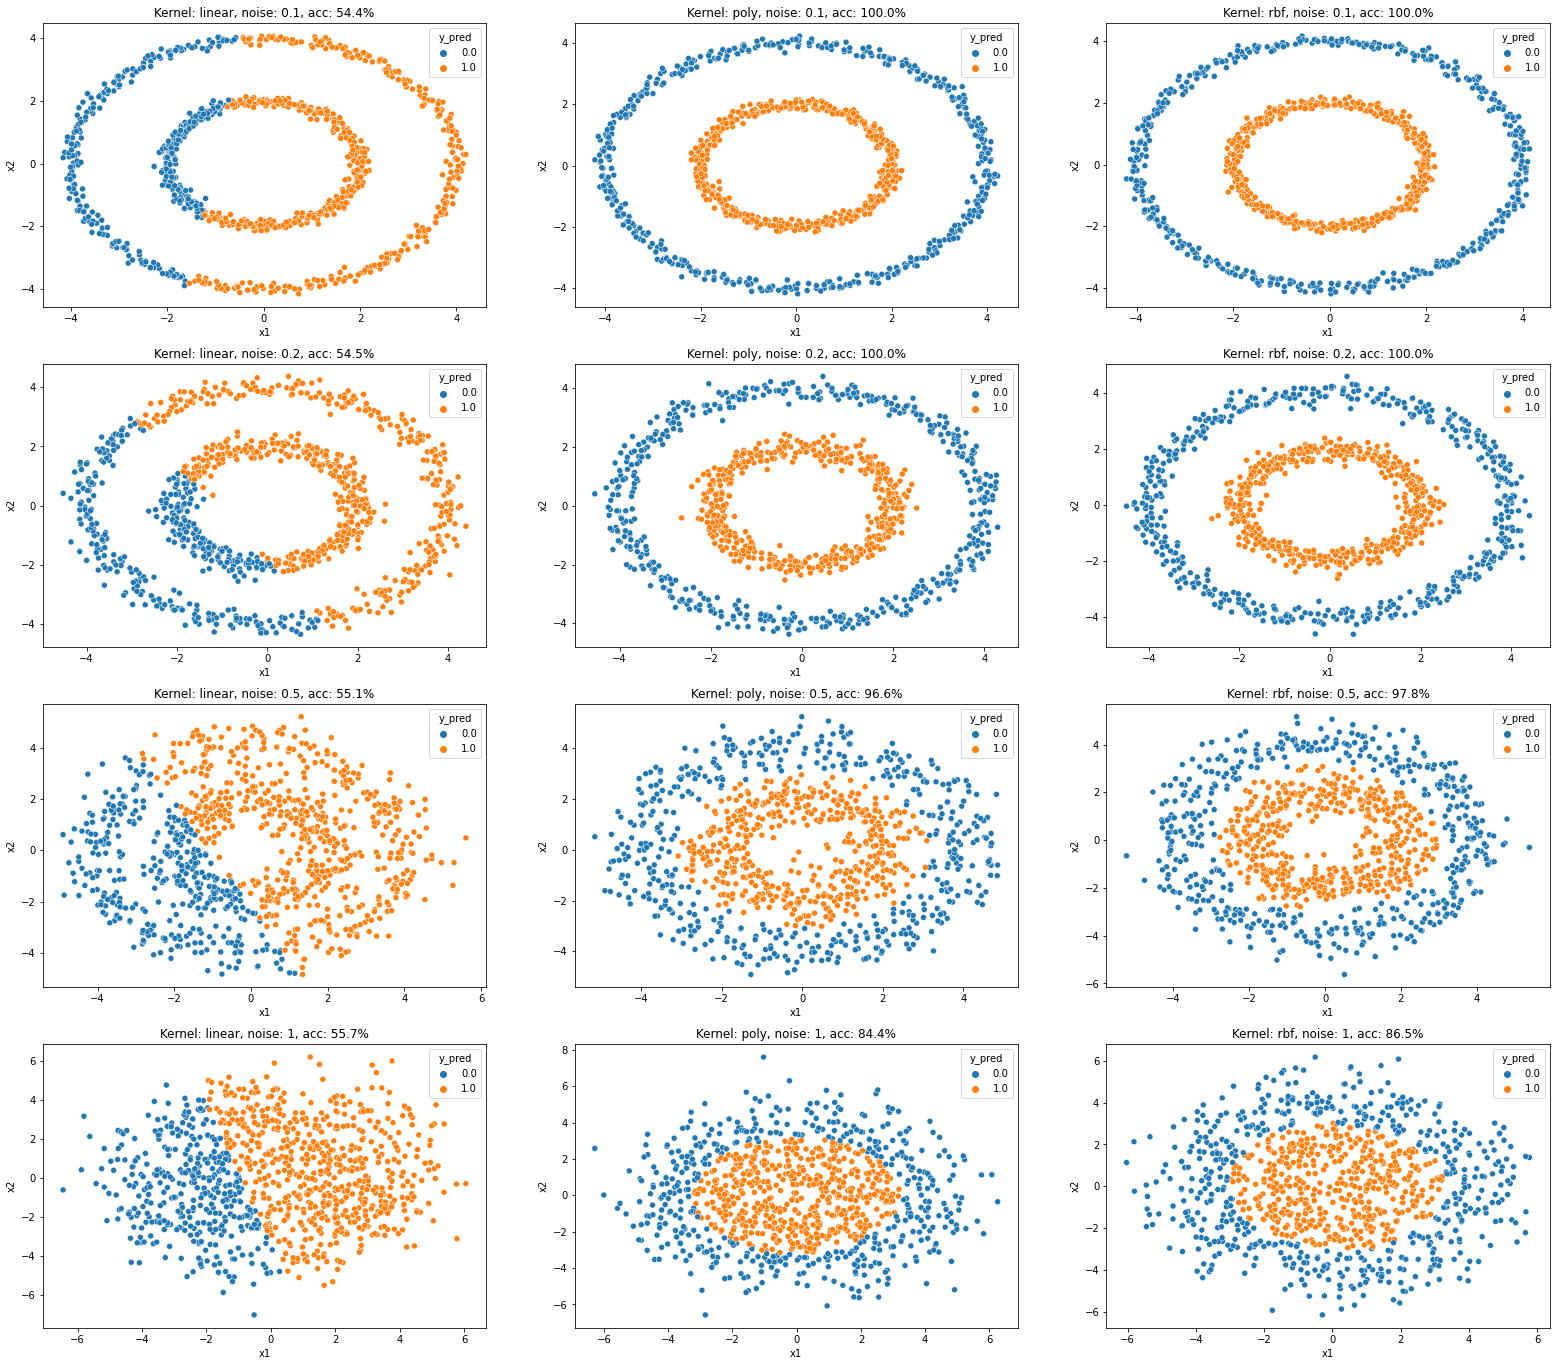

In [84]:
kernels = ['linear', 'poly', 'rbf']
noises = [0.1, 0.2, 0.5, 1]
fig, axs = plt.subplots(nrows=len(ms), ncols=len(kernels), figsize=(9*len(kernels),6*len(ms)))

for j, kernel in enumerate(kernels): 
    for i, noise in enumerate(noises):
        dataset = generate_data_2(noise=noise)
        model = SVC(kernel=kernel, degree=2)
        model = model.fit(dataset[['x1','x2']].values, dataset['y'].values)
        dataset['y_pred'] = model.predict(dataset[['x1','x2']].values)
        acc = round(100*model.score(dataset[['x1','x2']].values, dataset['y'].values), 2)
        sn.scatterplot(data=dataset, x='x1', y='x2', hue='y_pred', ax=axs[i,j])
        axs[i,j].set_title(f'Kernel: {kernel}, noise: {noise}, acc: {acc}%')